In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Sibsp = Sibling or Spouse travelling with the guy
#Parch = Parent Child
#Embarked = 1st Letter of Destination city of Passenger (3 City)
#Name me title hai so it can be used later on
#It is also depending on gender & age. Also Sibsp & Parch is quite important(They may get preference).
#Embarked also we are not sure. We are doubful.

In [10]:
train.info() #Helps to know missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#Cabin values are missing we will drop it. Cabin is useless.

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
train.drop(columns=['Cabin'],inplace = True)
test.drop(columns=['Cabin'],inplace = True)

In [16]:
train.isnull().sum() #To check null values in a column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [18]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [19]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
train['Embarked'].fillna('S',inplace=True)

In [21]:
train.drop(columns=['Cabin'],implace = True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [22]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [23]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [25]:
train_age = np.random.randint(train['Age'].mean()-train['Age'].std(), train['Age'].mean() + train['Age'].std(), 177)

In [27]:
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(), test['Age'].mean() + test['Age'].std(), 86)

In [28]:
train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [30]:
train['Age'][train['Age'].isnull()] = train_age

C:\Users\jaiswal\AppData\Local\Temp/ipykernel_7640/1833702416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = train_age


In [31]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
test['Age'][test['Age'].isnull()] = test_age
train.isnull().sum()

C:\Users\jaiswal\AppData\Local\Temp/ipykernel_7640/3542147511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = test_age


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
#EDA Stage = Exploratory Data Analysis

In [35]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,42.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [39]:
train[train['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [40]:
train[train['Pclass']==2]['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [41]:
train[train['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [42]:
#Percentage will tell us which class was more risky

In [46]:
100*train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [48]:
#In class 1 survival chances are more and it is decreasing as the class inc.
#There's a mathematical corelation

In [49]:
100*train.groupby(['Sex'])['Survived'].mean()

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [50]:
#Chances for survival for female are more than that of Male.

In [51]:
train.drop(columns='Ticket',inplace=True)

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

In [52]:
#Again a corelation. We Can't drop Embarked

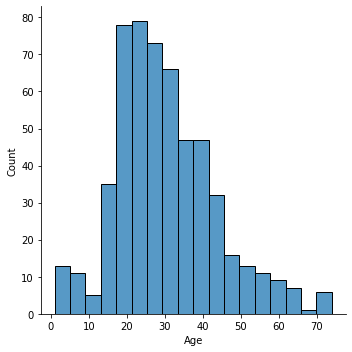

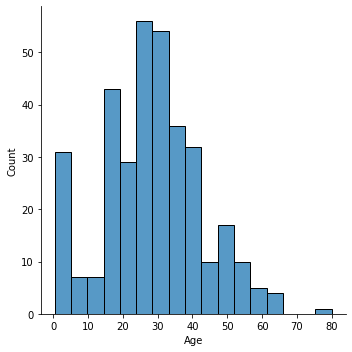

In [58]:
sns.displot(train['Age'][train['Survived']==0])
sns.displot(train['Age'][train['Survived']==1])

In [59]:
#Old people died more comapared to young

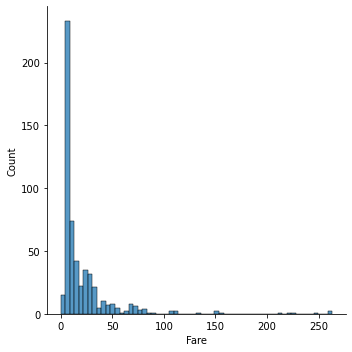

In [60]:
sns.displot(train['Fare'][train['Survived']==0])

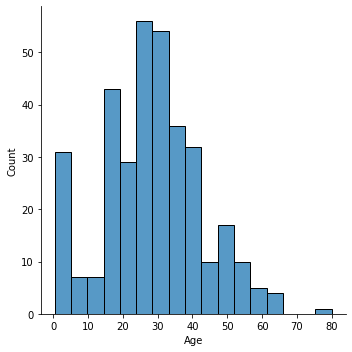

In [61]:
sns.displot(train['Age'][train['Survived']==1])

In [62]:
#When fare is low, survival rate is low. As fare increases, chances of survival increase.

In [75]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [77]:
test.drop(columns='Ticket',inplace=True)

In [84]:
train['Family'] = train['SibSp'] + train['Parch'] + 1 #1 for the individual
test['Family'] = test['SibSp'] + test['Parch'] + 1 #1 for the individual

In [85]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [86]:
100*train.groupby(['Family'])['Survived'].mean()

Family
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

In [87]:
#A clear pattern is visible. So we will create a function to define in categories

In [89]:
def family_to_size(number):
    if number == 1:
        return 'Alone'
    elif number >1 and number <5:
        return 'Medium'
    else:
        return 'Large'
train['FamilySize'] = train['Family'].apply(family_to_size)
test['FamilySize'] = test['Family'].apply(family_to_size)

In [94]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [98]:
train.drop(columns=['SibSp','Parch','Family'],inplace=True)
test.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [101]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Alone


In [102]:
passengerId = test['PassengerId'].values

In [103]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [104]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone


In [ ]:
#Now we willl do label Encoding

In [110]:
train = pd.get_dummies(train,columns=['Pclass','Sex','Embarked','Family Size'], drop_first=True)

In [111]:
train.shape

(891, 10)

In [143]:
train.head()
train.drop(columns=['Fare'])
test.drop(columns=['Fare'])

,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family Size_Large,Family Size_Medium
0,34.5,0,1,1,1,0,0,0
1,47.0,0,1,0,0,1,0,1
2,62.0,1,0,1,1,0,0,0
3,27.0,0,1,1,0,1,0,0
4,22.0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
413,25.0,0,1,1,0,1,0,0
414,39.0,0,0,0,0,0,0,0
415,38.5,0,1,1,0,1,0,0
416,22.0,0,1,1,0,1,0,0


In [116]:
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked','Family Size'], drop_first=True)
test.shape

(418, 9)

In [118]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [123]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [124]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [128]:
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.7988826815642458

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7988826815642458

In [131]:
Xfinal = test.iloc[:,:].values

In [132]:
y_final = clf.predict(Xfinal)

In [134]:
y_final.shape

(418,)

In [136]:
passengerId.shape

(418,)

In [138]:
df = pd.DataFrame()
df

""


In [139]:
df['passengerId'] = passengerId
df['survived'] = y_final

In [140]:
df

,passengerId,survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [141]:
df.to_csv('submission.csv',index=False)